In [ ]:
!pip install factor-analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=dba799d2477fbf0efa3f7ab69db92fb7324a9edc8464617f6108ff7f5fbb73d2
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


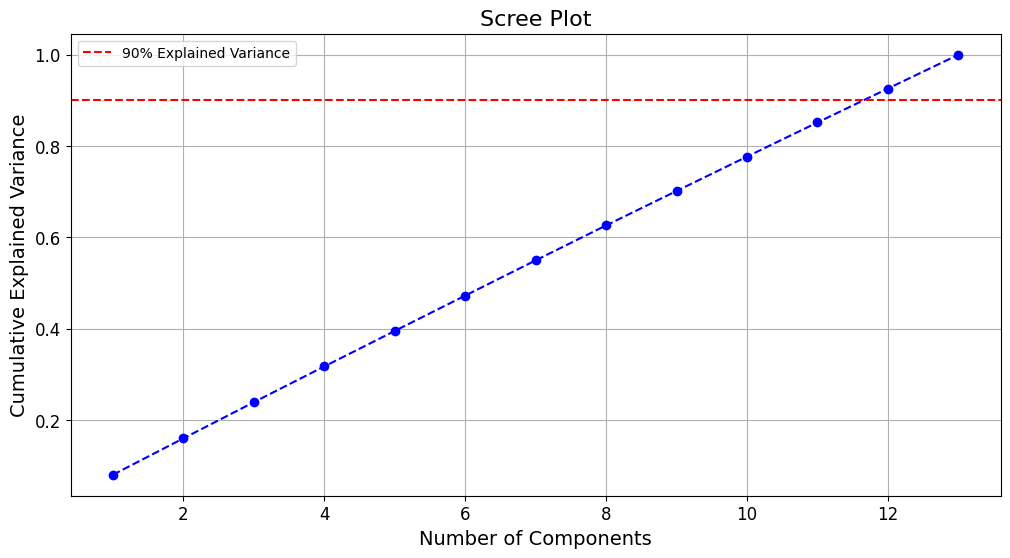

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


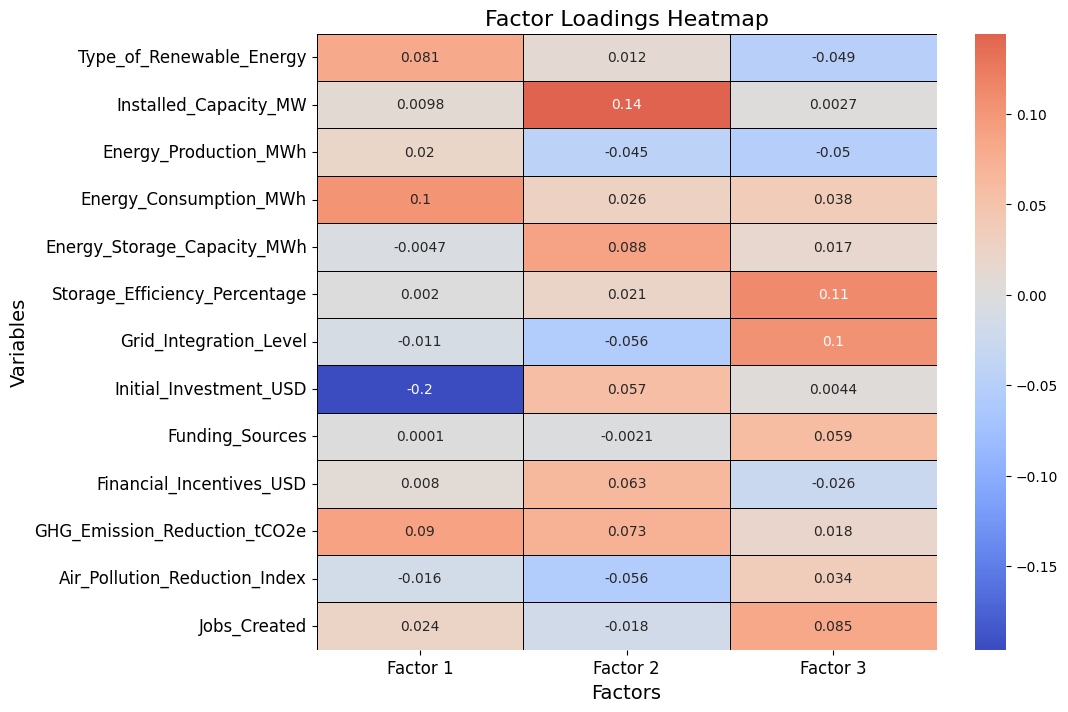

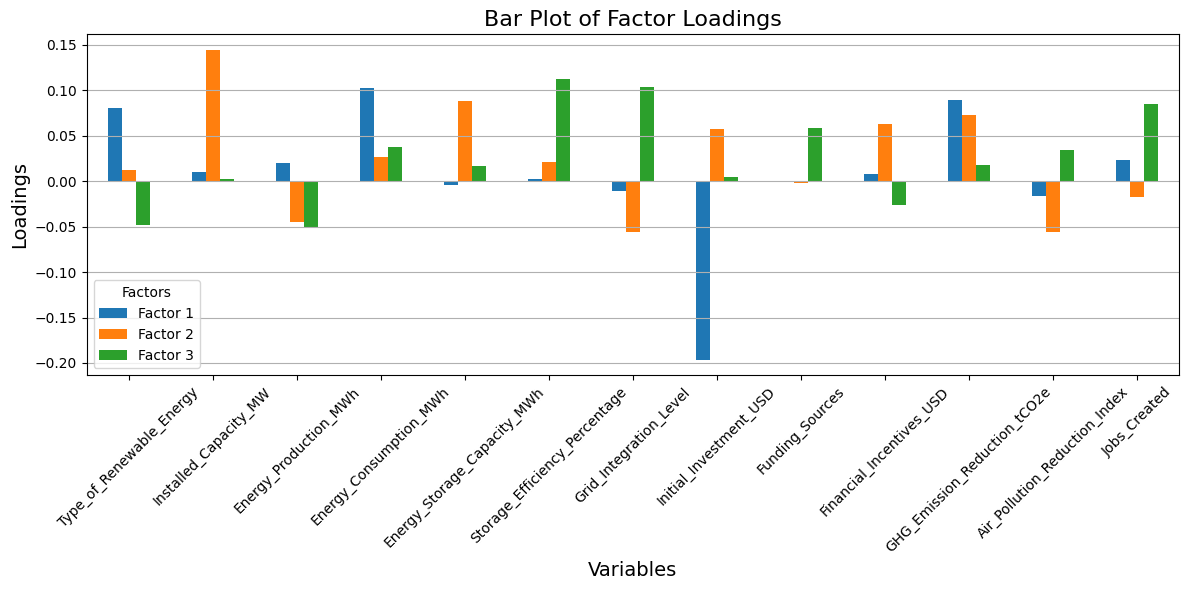

Bartlett's Test p-value: 0.8507665048293134
KMO Model Score: 0.5011878714817154
Factor Loadings:
                               Factor 1  Factor 2  Factor 3
Type_of_Renewable_Energy       0.080654  0.012322 -0.048708
Installed_Capacity_MW          0.009791  0.144419  0.002725
Energy_Production_MWh          0.019535 -0.044548 -0.050466
Energy_Consumption_MWh         0.102766  0.026114  0.037658
Energy_Storage_Capacity_MWh   -0.004703  0.087932  0.016508
Storage_Efficiency_Percentage  0.001968  0.021043  0.112139
Grid_Integration_Level        -0.011315 -0.056171  0.103222
Initial_Investment_USD        -0.196336  0.056882  0.004350
Funding_Sources                0.000102 -0.002127  0.058864
Financial_Incentives_USD       0.008041  0.063209 -0.026044
GHG_Emission_Reduction_tCO2e   0.089682  0.073147  0.018060
Air_Pollution_Reduction_Index -0.016217 -0.056052  0.034180
Jobs_Created                   0.023552 -0.017806  0.084506


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Load dataset
df = pd.read_csv("energy_dataset_.csv")

# Data Preprocessing
df = df.dropna()  # Drop missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA Analysis
pca = PCA()
pca.fit(df_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Scree Plot', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.show()

# Factor Analysis Suitability Test
bartlett_test, p_value = calculate_bartlett_sphericity(df_numeric)
kmo_all, kmo_model = calculate_kmo(df_numeric)

# Factor Analysis with 3 Factors (adjust based on scree plot)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_scaled)
factor_loadings = pd.DataFrame(fa.loadings_, index=numeric_cols, columns=["Factor 1", "Factor 2", "Factor 3"])

# Heatmap of Factor Loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Factor Loadings Heatmap', fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Bar Plot of Factor Loadings
factor_loadings.plot(kind='bar', figsize=(12, 6))
plt.title('Bar Plot of Factor Loadings', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Loadings', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Factors')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print results
print("Bartlett's Test p-value:", p_value)
print("KMO Model Score:", kmo_model)
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Load dataset
file_path = "energy_dataset_.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

(None,
    Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
 0                         4              93.423205            103853.2206   
 1                         4             590.468942            190223.0649   
 2                         1             625.951142            266023.4824   
 3                         1             779.998728            487039.5296   
 4                         3             242.106837            482815.0856   
 
    Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
 0             248708.4892                  2953.248771   
 1             166104.1642                  5305.174042   
 2             424114.6308                  2620.192622   
 3             308337.7316                  1925.250307   
 4             360437.7705                  3948.945383   
 
    Storage_Efficiency_Percentage  Grid_Integration_Level  \
 0                      89.887562                       4   
 1                      84.403343            

In [ ]:
# Menampilkan informasi umum tentang dataset
df.info()

# Mengecek apakah ada missing values
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

,0
Type_of_Renewable_Energy,0
Installed_Capacity_MW,0
Energy_Production_MWh,0
Energy_Consumption_MWh,0
Energy_Storage_Capacity_MWh,0
Storage_Efficiency_Percentage,0
Grid_Integration_Level,0
Initial_Investment_USD,0
Funding_Sources,0
Financial_Incentives_USD,0


In [ ]:
# Generate descriptive statistics
df.describe()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


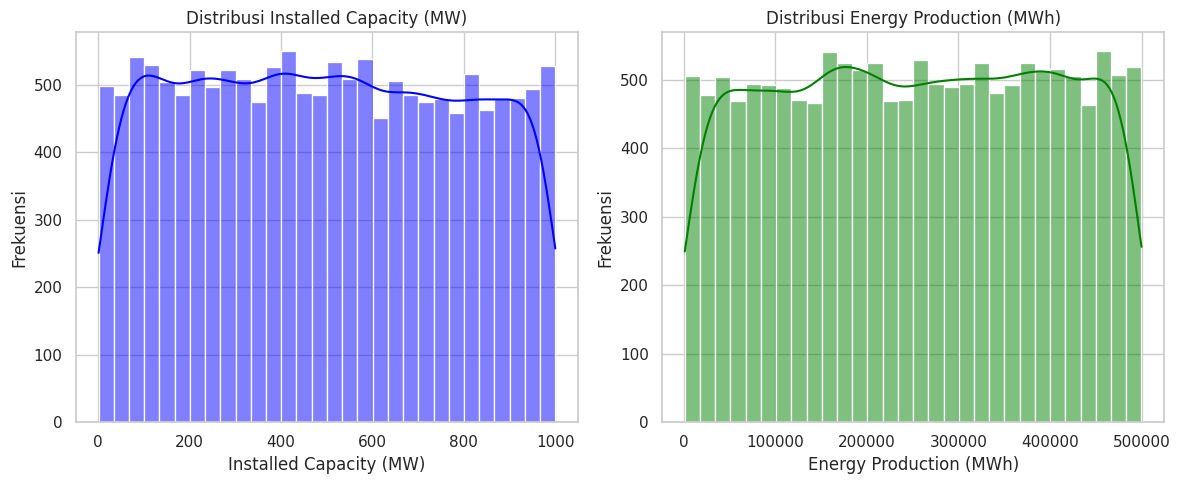

In [ ]:
# Visualisasi distribusi kapasitas terpasang (Installed Capacity) dan produksi energi
plt.figure(figsize=(12, 5))

# Histogram Installed Capacity
plt.subplot(1, 2, 1)
sns.histplot(df["Installed_Capacity_MW"], bins=30, kde=True, color="blue")
plt.title("Distribusi Installed Capacity (MW)")
plt.xlabel("Installed Capacity (MW)")
plt.ylabel("Frekuensi")

# Histogram Energy Production
plt.subplot(1, 2, 2)
sns.histplot(df["Energy_Production_MWh"], bins=30, kde=True, color="green")
plt.title("Distribusi Energy Production (MWh)")
plt.xlabel("Energy Production (MWh)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

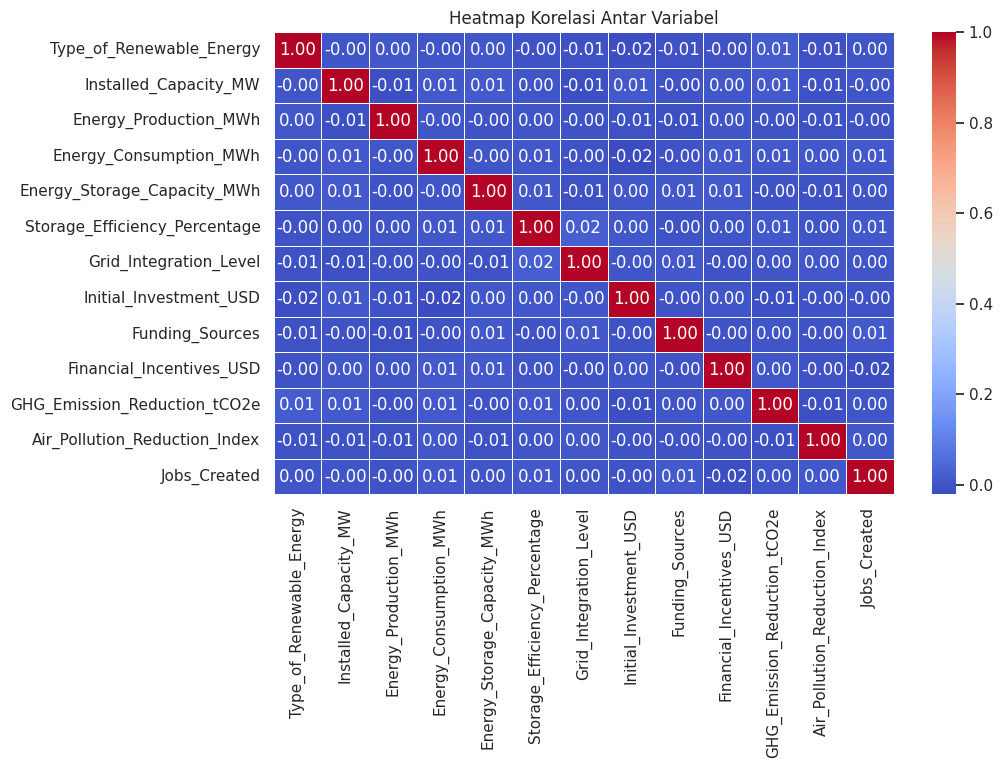

In [ ]:
# Visualisasi korelasi antar variabel dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
# Uji Bartlett untuk melihat apakah korelasi antar variabel cukup signifikan untuk analisis faktor
bartlett_stat, bartlett_p = calculate_bartlett_sphericity(df.dropna())

# Uji KMO untuk melihat kecukupan sampel dalam analisis faktor
kmo_all, kmo_model = calculate_kmo(df.dropna())

bartlett_stat, bartlett_p, kmo_model

(np.float64(65.1229324088913),
 np.float64(0.8507665048293134),
 np.float64(0.5011878714817154))

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Uji Bartlett
bartlett_stat, bartlett_p = calculate_bartlett_sphericity(df.dropna())
print(f"Bartlett’s Test: Statistic={bartlett_stat}, p-value={bartlett_p}")

# Uji KMO
kmo_all, kmo_model = calculate_kmo(df.dropna())
print(f"KMO Test: {kmo_model}")

Bartlett’s Test: Statistic=65.1229324088913, p-value=0.8507665048293134
KMO Test: 0.5011878714817154


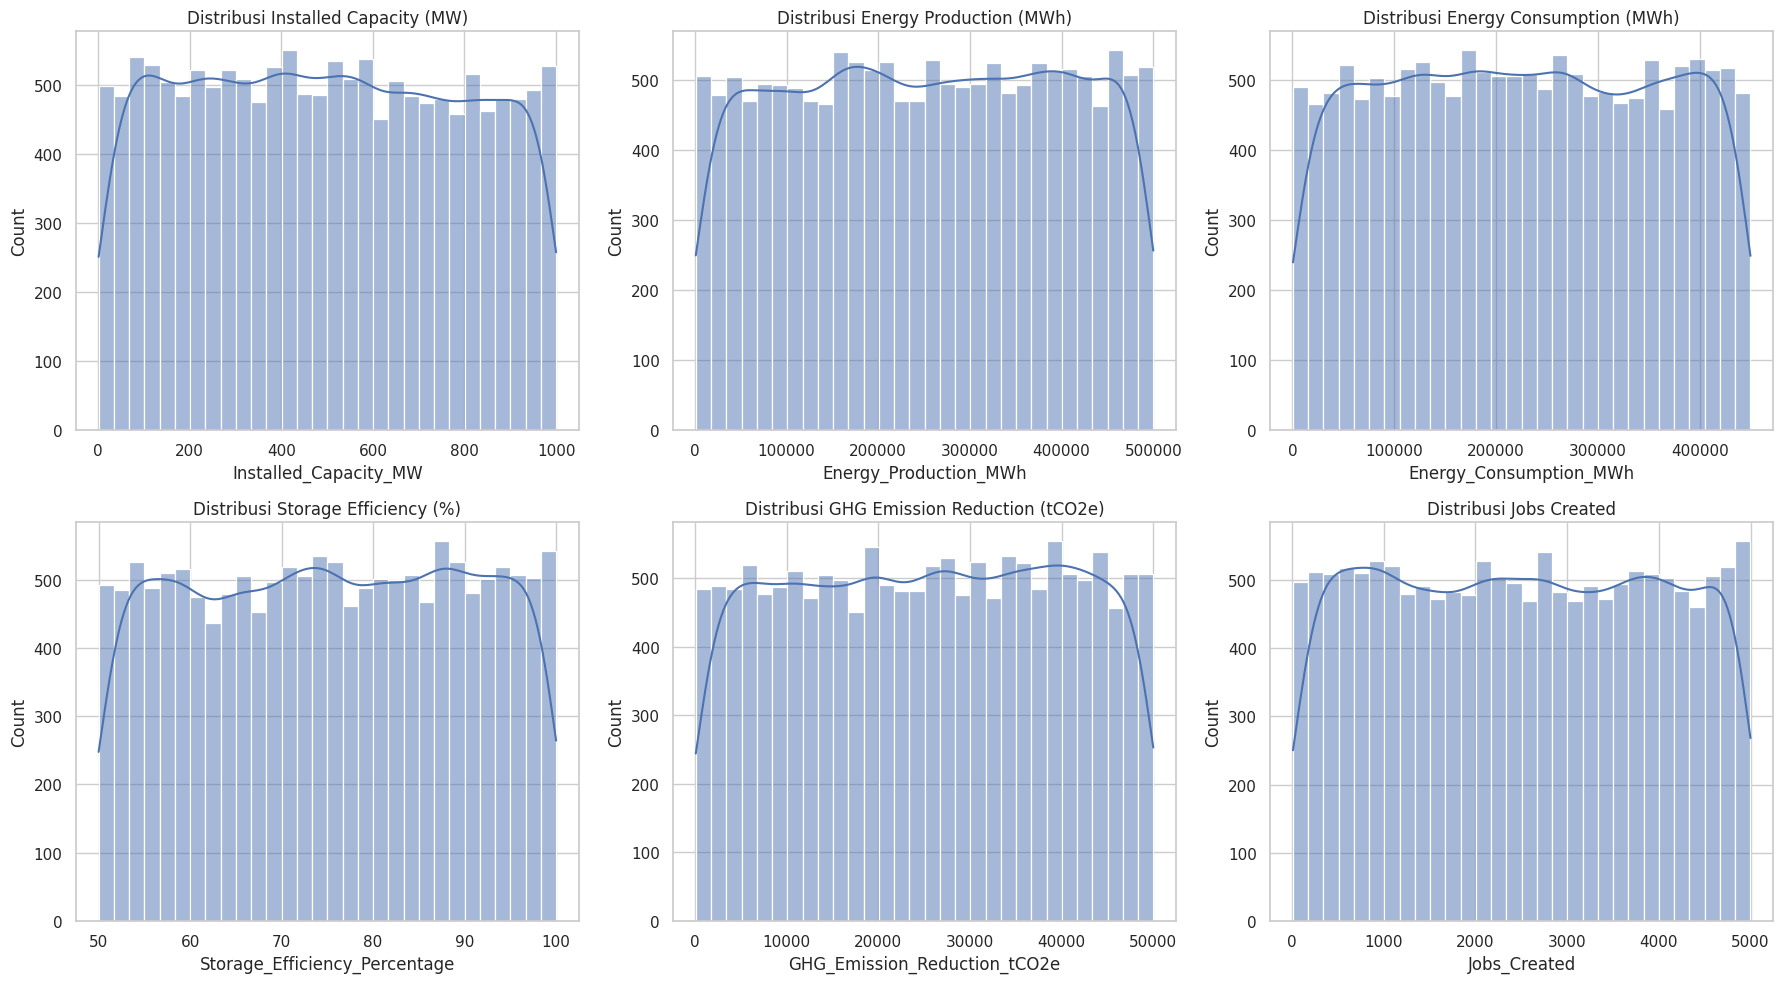

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribusi beberapa variabel utama
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df["Installed_Capacity_MW"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Installed Capacity (MW)")

sns.histplot(df["Energy_Production_MWh"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Energy Production (MWh)")

sns.histplot(df["Energy_Consumption_MWh"], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribusi Energy Consumption (MWh)")

sns.histplot(df["Storage_Efficiency_Percentage"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Storage Efficiency (%)")

sns.histplot(df["GHG_Emission_Reduction_tCO2e"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribusi GHG Emission Reduction (tCO2e)")

sns.histplot(df["Jobs_Created"], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Distribusi Jobs Created")

plt.tight_layout()
plt.show()

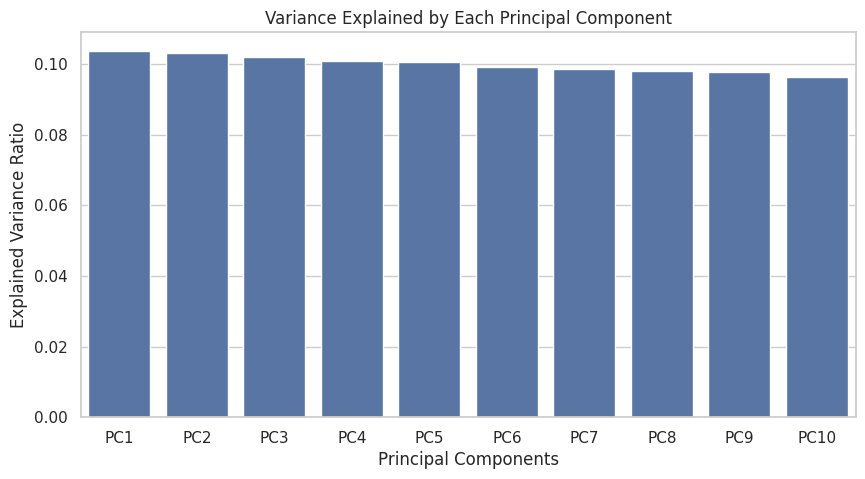

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pilih variabel numerik untuk PCA
numerical_features = [
    "Installed_Capacity_MW", "Energy_Production_MWh", "Energy_Consumption_MWh",
    "Energy_Storage_Capacity_MWh", "Storage_Efficiency_Percentage",
    "Initial_Investment_USD", "Financial_Incentives_USD", "GHG_Emission_Reduction_tCO2e",
    "Air_Pollution_Reduction_Index", "Jobs_Created"
]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# PCA dengan jumlah komponen sama dengan jumlah variabel
pca = PCA(n_components=len(numerical_features))
pca.fit(scaled_data)

# Variance explained oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_

# Plot variance explained
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_variance))], y=explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Each Principal Component")
plt.show()

In [ ]:
import numpy as np

# Hitung jumlah komponen yang mencakup 95% variabilitas data
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

# Tampilkan jumlah komponen optimal
optimal_components

np.int64(10)

In [ ]:
# Buat dataframe untuk menunjukkan kontribusi setiap variabel terhadap komponen utama
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(numerical_features))],
                        index=numerical_features)

# Tampilkan kontribusi variabel terhadap komponen utama
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Installed_Capacity_MW,0.428451,0.260179,0.234988,-0.374523,0.020331,-0.209019,0.365658,0.508947,-0.149612,-0.306645
Energy_Production_MWh,-0.131037,-0.125123,-0.445560,0.351840,-0.483197,-0.072407,0.351585,0.475615,0.231392,0.052647
Energy_Consumption_MWh,0.452910,-0.420528,-0.110378,0.122964,0.252472,-0.100562,0.405455,-0.153462,-0.288132,0.495889
Energy_Storage_Capacity_MWh,0.313723,0.357586,0.167760,0.437012,0.027026,-0.457321,-0.420897,0.162524,0.172409,0.333799
Storage_Efficiency_Percentage,0.232914,-0.051609,0.366957,0.508109,-0.241390,0.557440,-0.070687,0.106779,-0.361804,-0.184247
Initial_Investment_USD,-0.231315,0.519750,0.335416,0.012689,-0.085175,0.223095,0.509904,-0.178585,0.162101,0.434156
Financial_Incentives_USD,0.323962,0.321690,-0.380985,0.314122,0.332643,0.140857,0.217362,-0.313250,0.296124,-0.429173
GHG_Emission_Reduction_tCO2e,0.482783,-0.122065,-0.035264,-0.365563,-0.236966,0.428726,-0.205764,0.031754,0.529348,0.231572
Air_Pollution_Reduction_Index,-0.220033,-0.241028,0.222887,0.145919,0.652671,0.219698,0.032426,0.479086,0.340509,0.041851
Jobs_Created,0.038836,-0.403308,0.512540,0.133812,-0.208151,-0.345526,0.213305,-0.304706,0.412681,-0.289596


<ipython-input-12-bd828967050a>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.6, c=colors, cmap='viridis')


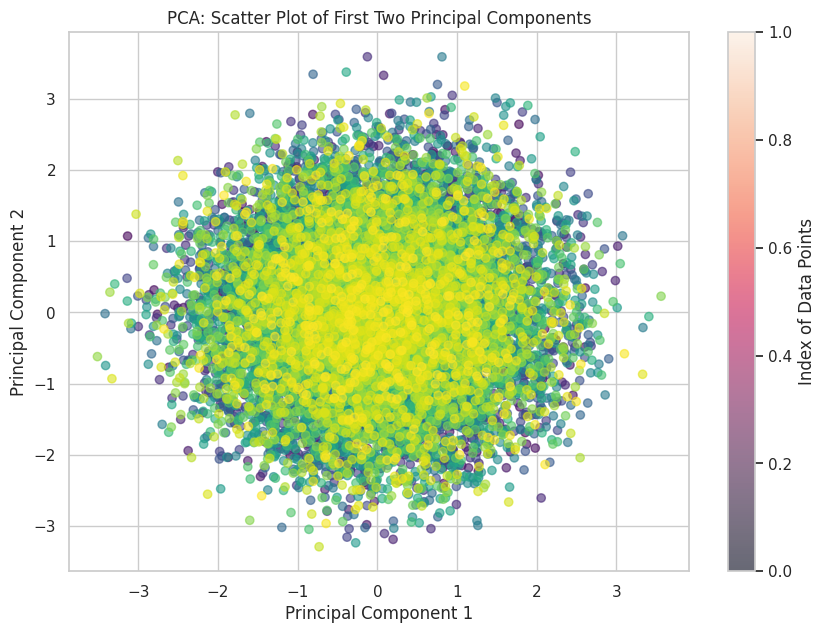

In [ ]:
import matplotlib.cm as cm

# Ambil dua komponen utama pertama untuk visualisasi
pca_transformed = pca.transform(scaled_data)

# Buat scatter plot dari dua komponen utama pertama
plt.figure(figsize=(10, 7))
colors = cm.viridis(np.linspace(0, 1, len(df)))

plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.6, c=colors, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Scatter Plot of First Two Principal Components")
plt.colorbar(label="Index of Data Points")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Lakukan FA dengan jumlah faktor yang sama seperti jumlah optimal di PCA
fa = FactorAnalysis(n_components=optimal_components, random_state=42)
fa.fit(scaled_data)

# Faktor loadings
factor_loadings = pd.DataFrame(fa.components_.T,
                               columns=[f"Factor{i+1}" for i in range(optimal_components)],
                               index=numerical_features)

# Tampilkan faktor loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Installed_Capacity_MW,0.085559,0.067154,0.046310,0.046724,-0.017840,0.006817,-0.0,0.0,-0.0,0.0
Energy_Production_MWh,-0.022574,-0.029220,-0.069480,-0.021614,0.070655,0.002142,-0.0,0.0,0.0,-0.0
Energy_Consumption_MWh,0.116777,-0.073755,-0.016164,-0.026898,-0.025829,0.001887,-0.0,-0.0,-0.0,-0.0
Energy_Storage_Capacity_MWh,0.056219,0.080307,0.025950,-0.059758,0.013947,0.011914,0.0,0.0,0.0,-0.0
Storage_Efficiency_Percentage,0.045804,-0.000678,0.059322,-0.055419,0.042976,-0.014884,0.0,0.0,-0.0,0.0
Initial_Investment_USD,-0.068336,0.101201,0.054962,-0.002694,0.005119,-0.007069,-0.0,-0.0,0.0,-0.0
Financial_Incentives_USD,0.065680,0.073859,-0.071580,-0.049843,-0.024290,-0.004781,-0.0,-0.0,0.0,0.0
GHG_Emission_Reduction_tCO2e,0.107005,-0.008588,0.002878,0.059498,0.020046,-0.011926,0.0,-0.0,0.0,-0.0
Air_Pollution_Reduction_Index,-0.038568,-0.050884,0.028744,-0.040648,-0.072690,-0.006317,0.0,0.0,0.0,-0.0
Jobs_Created,0.015720,-0.076947,0.093219,-0.018254,0.025776,0.007470,-0.0,-0.0,0.0,0.0


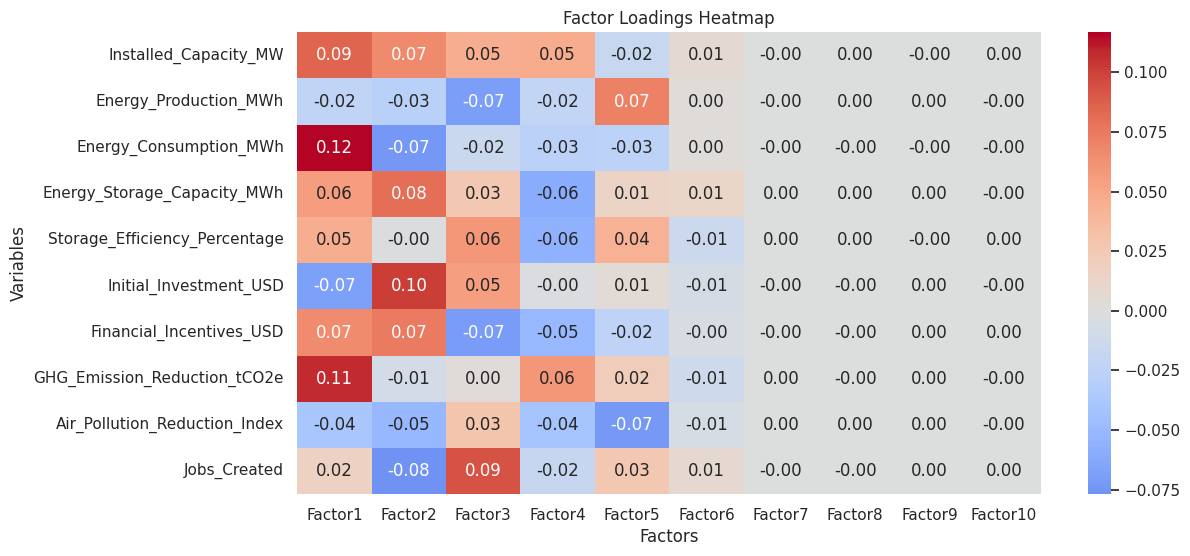

In [ ]:
import seaborn as sns

# Visualisasi faktor loadings menggunakan heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Factor Loadings Heatmap")
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.show()

Statistika Deskriptif:
       Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
count              15000.000000           15000.000000           15000.000000   
mean                   3.973933             495.855747          252350.955621   
std                    1.999380             288.212872          144062.915425   
min                    1.000000               1.091767            1030.103692   
25%                    2.000000             245.475737          128568.875900   
50%                    4.000000             492.907555          253216.871250   
75%                    6.000000             742.254682          377083.805575   
max                    7.000000             999.982979          499991.200400   

       Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
count            15000.000000                 15000.000000   
mean            225981.854966                  5030.196472   
std             129223.677997                  2894.096326   

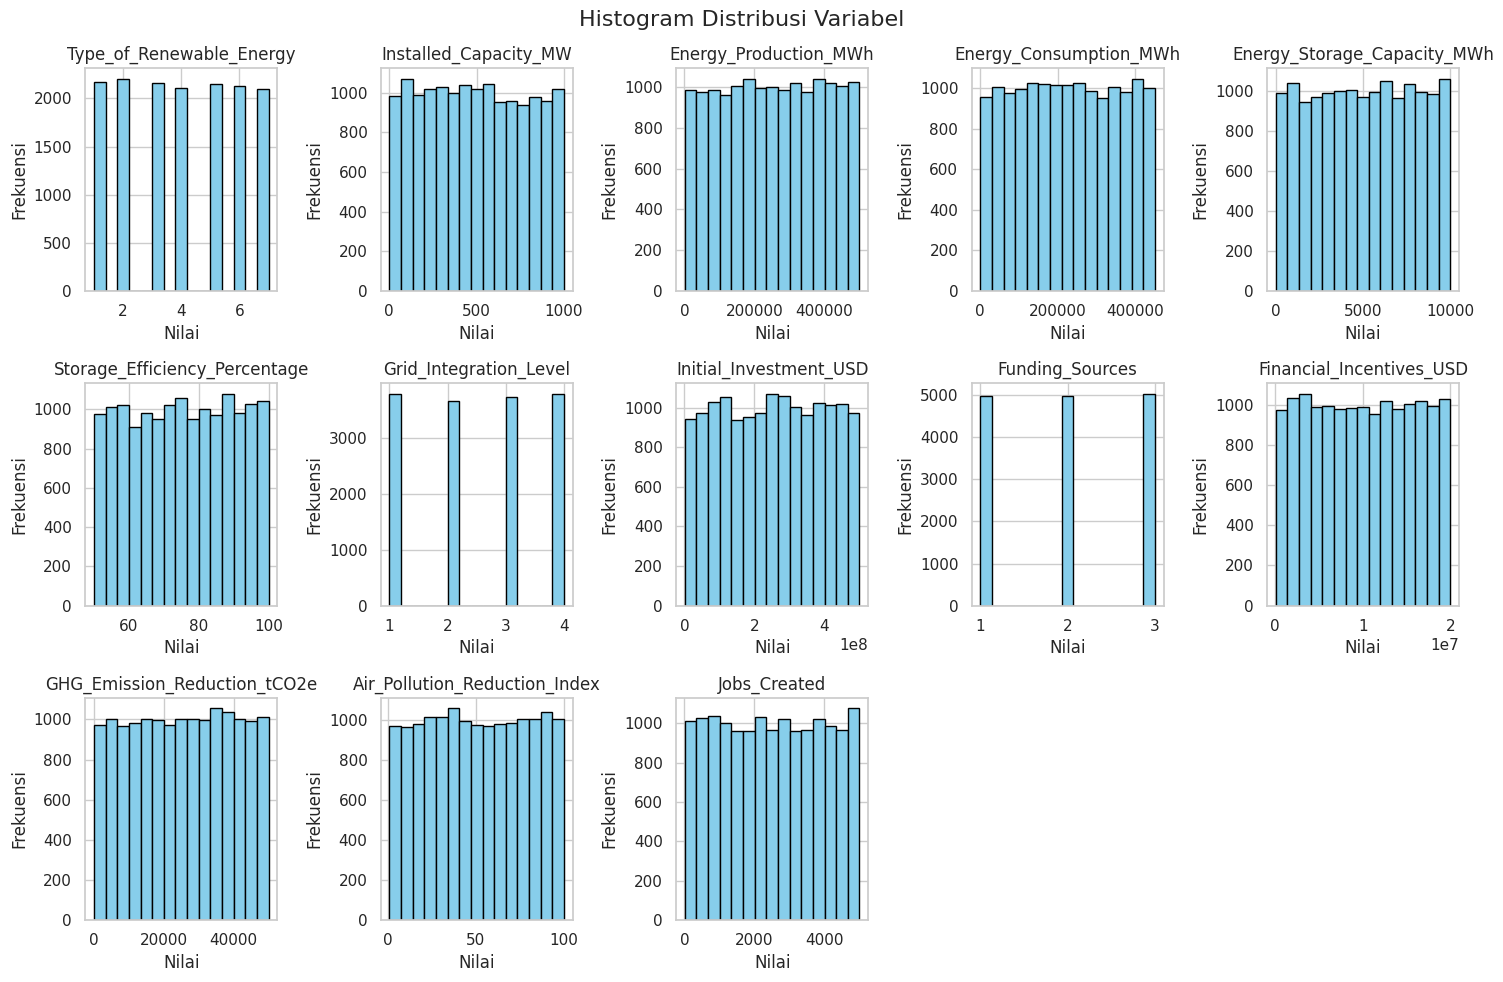

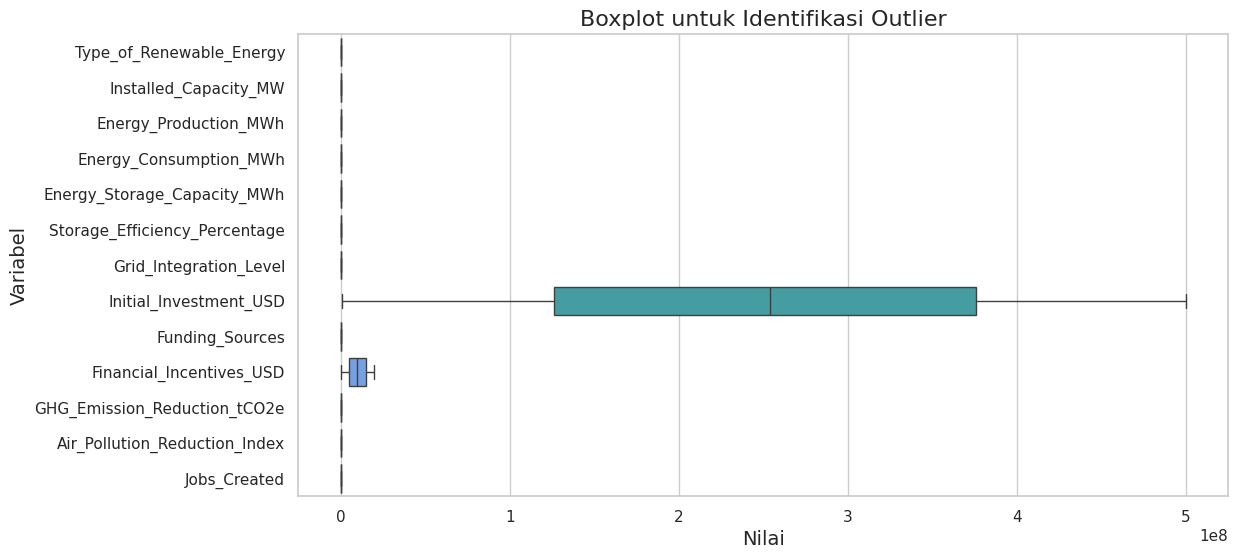

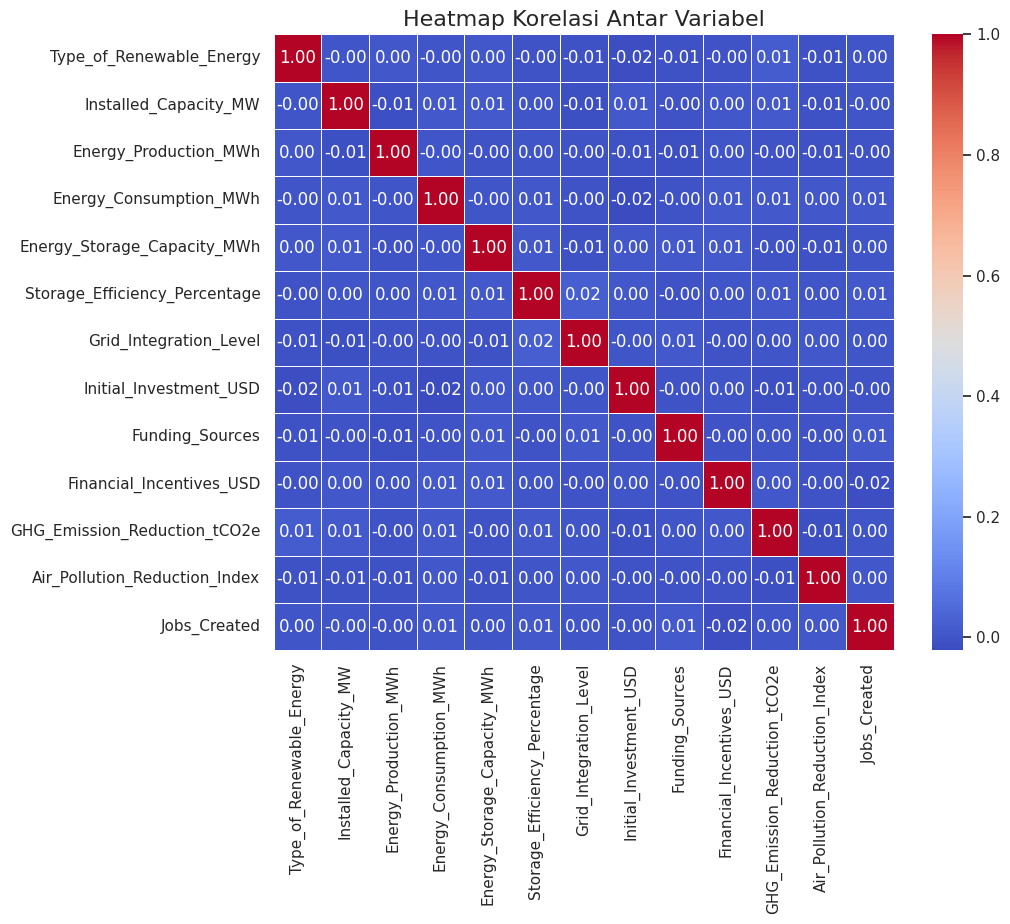

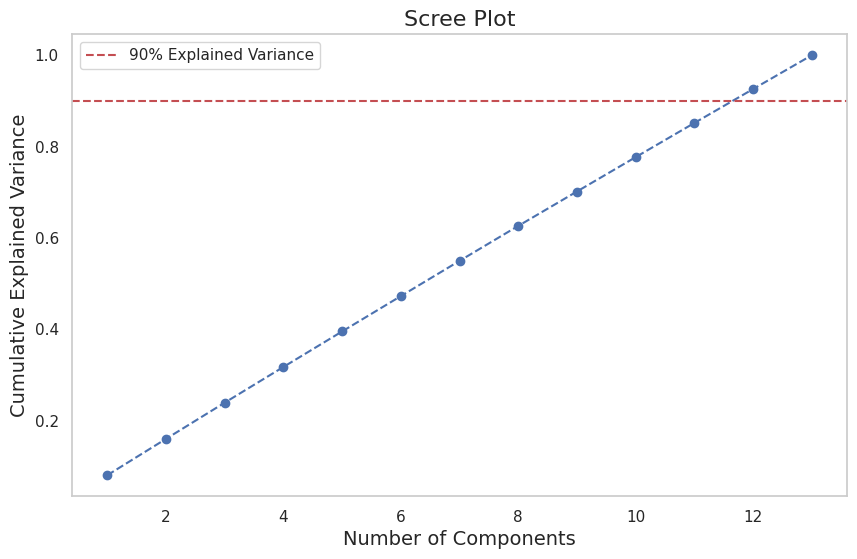

Bartlett's Test p-value: 0.8507665048293134
KMO Model Score: 0.5011878714817154


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


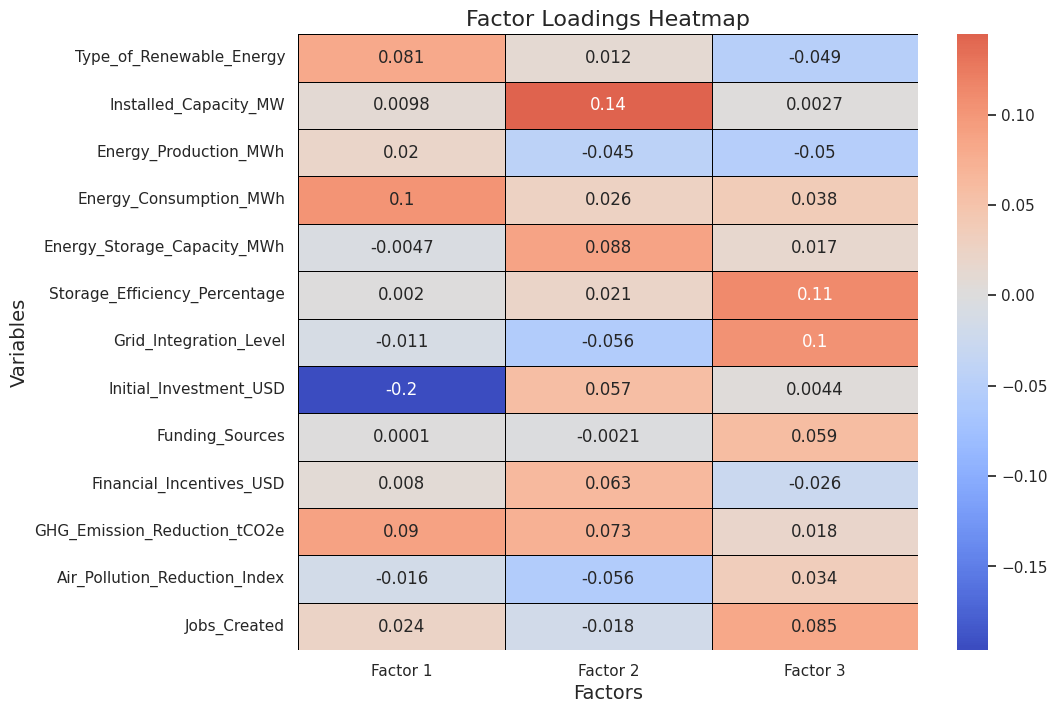

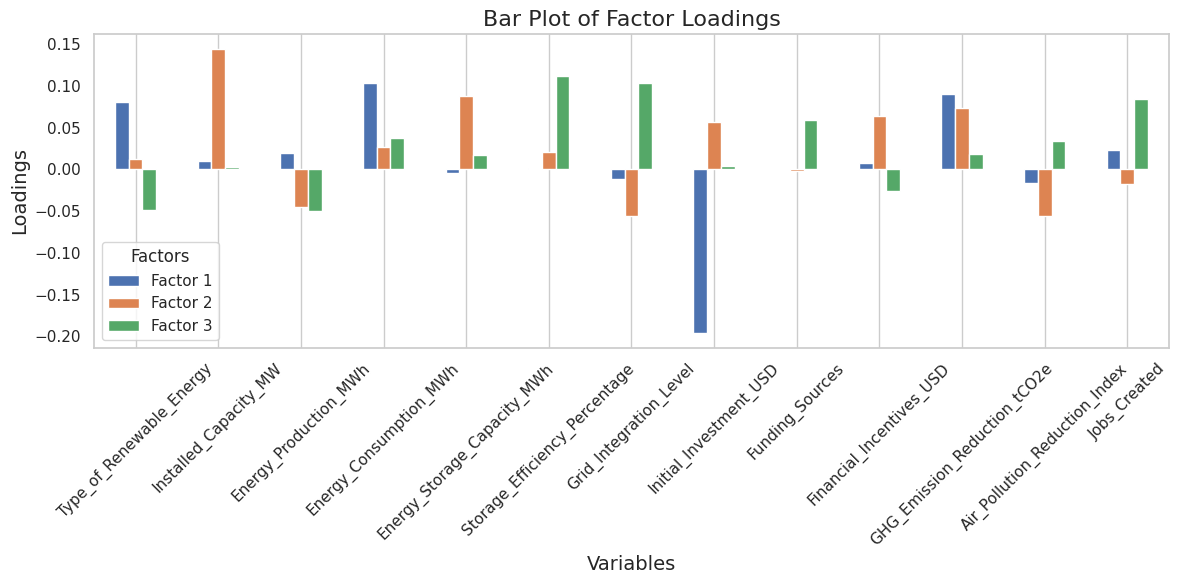

Factor Loadings:
                               Factor 1  Factor 2  Factor 3
Type_of_Renewable_Energy       0.080654  0.012322 -0.048708
Installed_Capacity_MW          0.009791  0.144419  0.002725
Energy_Production_MWh          0.019535 -0.044548 -0.050466
Energy_Consumption_MWh         0.102766  0.026114  0.037658
Energy_Storage_Capacity_MWh   -0.004703  0.087932  0.016508
Storage_Efficiency_Percentage  0.001968  0.021043  0.112139
Grid_Integration_Level        -0.011315 -0.056171  0.103222
Initial_Investment_USD        -0.196336  0.056882  0.004350
Funding_Sources                0.000102 -0.002127  0.058864
Financial_Incentives_USD       0.008041  0.063209 -0.026044
GHG_Emission_Reduction_tCO2e   0.089682  0.073147  0.018060
Air_Pollution_Reduction_Index -0.016217 -0.056052  0.034180
Jobs_Created                   0.023552 -0.017806  0.084506

Kesimpulan:
1. PCA berhasil mereduksi dimensi data dengan mempertahankan sebagian besar informasi.
2. FA mengidentifikasi faktor utama yang be

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Load dataset
df = pd.read_csv("energy_dataset_.csv")  # Ganti dengan path dataset Anda

# Data Preprocessing
df = df.dropna()  # Drop missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Statistika Deskriptif
print("Statistika Deskriptif:")
print(df_numeric.describe())

# Visualisasi Statistika Deskriptif dengan plt.subplots
n_cols = 5
n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang diperlukan
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Mengubah array 2D menjadi 1D untuk akses yang lebih mudah

for i, col in enumerate(df_numeric.columns):
    axes[i].hist(df_numeric[col], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram Distribusi Variabel', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot untuk Identifikasi Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, orient='h')
plt.title('Boxplot untuk Identifikasi Outlier', fontsize=16)
plt.xlabel('Nilai', fontsize=14)
plt.ylabel('Variabel', fontsize=14)
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=16)
plt.show()

# Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA Analysis
pca = PCA()
pca.fit(df_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Scree Plot', fontsize=16)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Factor Analysis Suitability Test
bartlett_test, p_value = calculate_bartlett_sphericity(df_numeric)
kmo_all, kmo_model = calculate_kmo(df_numeric)

print("Bartlett's Test p-value:", p_value)
print("KMO Model Score:", kmo_model)

# Factor Analysis with 3 Factors (adjust based on scree plot)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_scaled)
factor_loadings = pd.DataFrame(fa.loadings_, index=numeric_cols, columns=["Factor 1", "Factor 2", "Factor 3"])

# Heatmap of Factor Loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Factor Loadings Heatmap', fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.show()

# Bar Plot of Factor Loadings
factor_loadings.plot(kind='bar', figsize=(12, 6))
plt.title('Bar Plot of Factor Loadings', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Loadings', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Factors')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print results
print("Factor Loadings:")
print(factor_loadings)

# Kesimpulan dari analisis
print("\nKesimpulan:")
print("1. PCA berhasil mereduksi dimensi data dengan mempertahankan sebagian besar informasi.")
print("2. FA mengidentifikasi faktor utama yang berpengaruh terhadap sistem energi terbarukan.")
print("3. Analisis ini dapat membantu pengambilan keputusan dalam kebijakan energi yang lebih efisien dan berkelanjutan.")

In [ ]:
# Scatter Plot PCA (Visualisasi Proyeksi Data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot PCA - Proyeksi Data")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Biplot PCA untuk menampilkan arah variabel asli
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, alpha=0.7, edgecolors='k')

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.7, head_width=0.03)
        plt.text(coeff[i, 0] * 1.1, coeff[i, 1] * 1.1, labels[i], color='red', fontsize=12)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Biplot")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Menampilkan Biplot PCA
biplot(pca_result, pca.components_.T, labels=df_selected.columns)


NameError: name 'pca_result' is not defined

<Figure size 800x600 with 0 Axes>

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created               

<Figure size 1200x800 with 0 Axes>

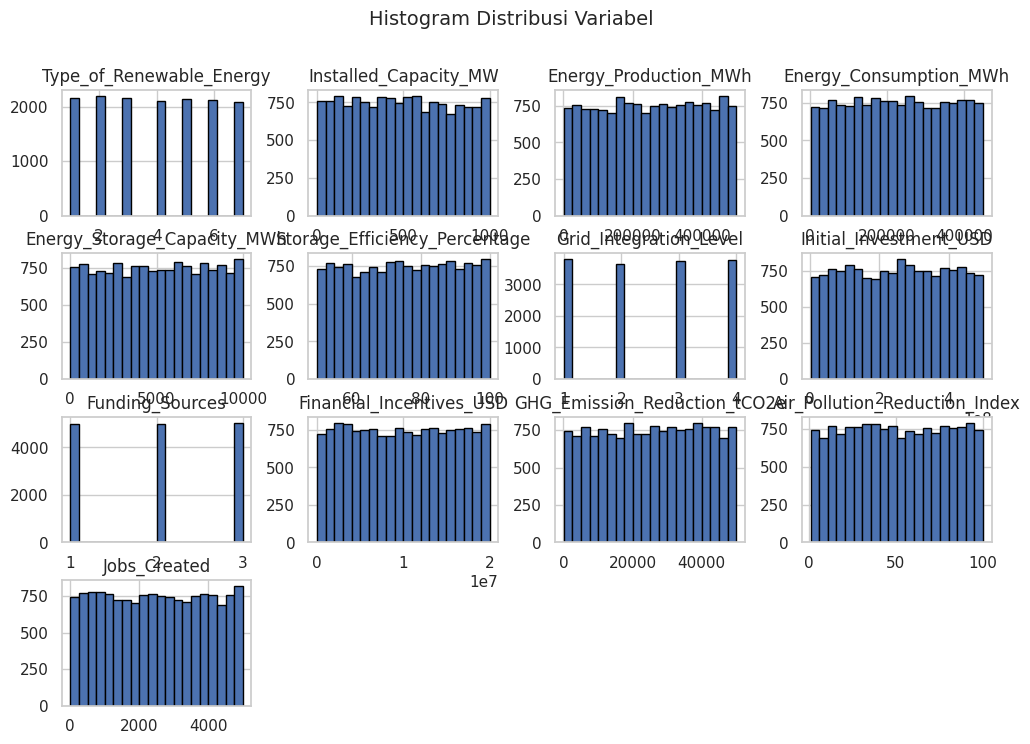


Explained Variance Ratio: [0.0802612  0.07959294]


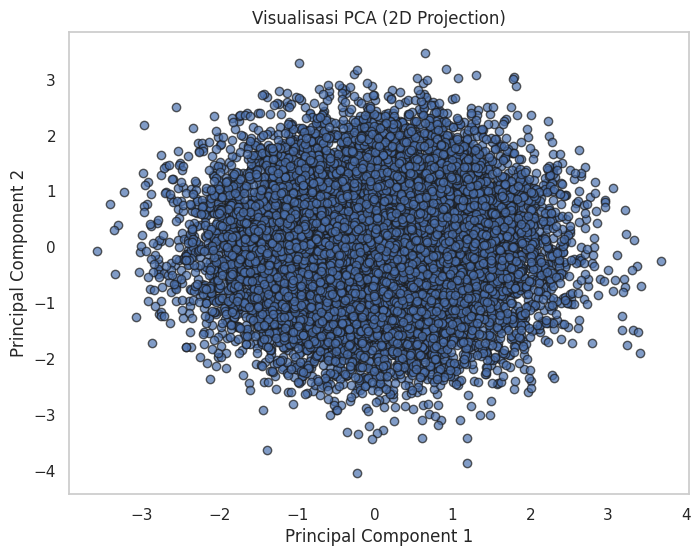

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("energy_dataset_.csv")  # Sesuaikan dengan lokasi penyimpanan

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 data pertama
print("\nData Awal:")
print(df.head())

# --- PREPROCESSING ---
# Pilih hanya kolom numerik untuk analisis
df_numeric = df.select_dtypes(include=[np.number])

# Drop missing values (jika ada)
df_numeric = df_numeric.dropna()

# --- VISUALISASI HISTOGRAM ---
plt.figure(figsize=(12, 8))
df_numeric.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel", fontsize=14)
plt.show()

# --- PCA (Principal Component Analysis) ---
# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Terapkan PCA
pca = PCA(n_components=2)  # Ambil 2 komponen utama
pca_result = pca.fit_transform(df_scaled)

# Konversi hasil PCA ke DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Menampilkan variance explained
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)

# --- VISUALISASI HASIL PCA ---
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi PCA (2D Projection)")
plt.grid()
plt.show()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created               

<Figure size 1200x800 with 0 Axes>

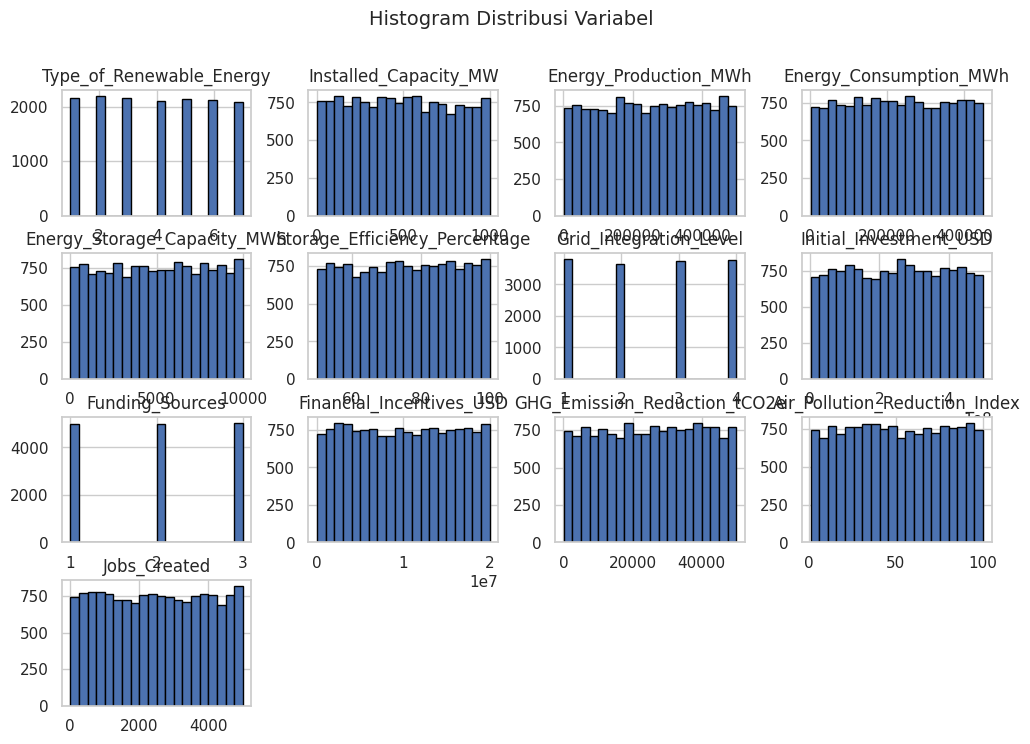


Explained Variance Ratio: [0.0802612  0.07959294]


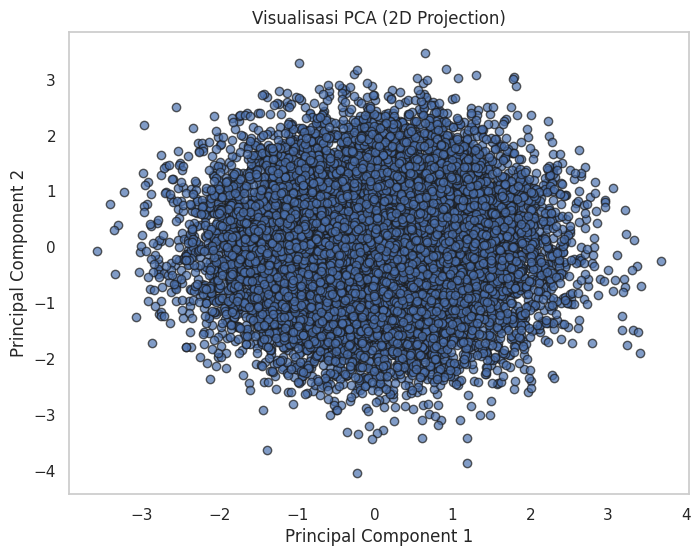

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("energy_dataset_.csv")  # Sesuaikan dengan lokasi penyimpanan

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 data pertama
print("\nData Awal:")
print(df.head())

# --- PREPROCESSING ---
# Pilih hanya kolom numerik untuk analisis
df_numeric = df.select_dtypes(include=[np.number])

# Drop missing values (jika ada)
df_numeric = df_numeric.dropna()

# --- VISUALISASI HISTOGRAM ---
plt.figure(figsize=(12, 8))
df_numeric.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel", fontsize=14)
plt.show()

# --- PCA (Principal Component Analysis) ---
# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Terapkan PCA
pca = PCA(n_components=2)  # Ambil 2 komponen utama
pca_result = pca.fit_transform(df_scaled)

# Konversi hasil PCA ke DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Menampilkan variance explained
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)

# --- VISUALISASI HASIL PCA ---
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi PCA (2D Projection)")
plt.grid()
plt.show()


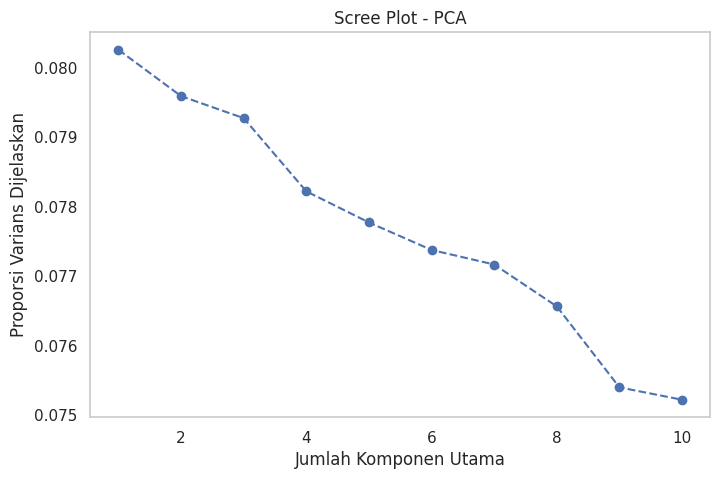

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Terapkan PCA
pca = PCA(n_components=10)  # Sesuaikan dengan jumlah komponen
pca.fit(df_scaled)

# Plot Scree Plot PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', linestyle='dashed', color='b')
plt.xlabel("Jumlah Komponen Utama")
plt.ylabel("Proporsi Varians Dijelaskan")
plt.title("Scree Plot - PCA")
plt.grid()
plt.show()


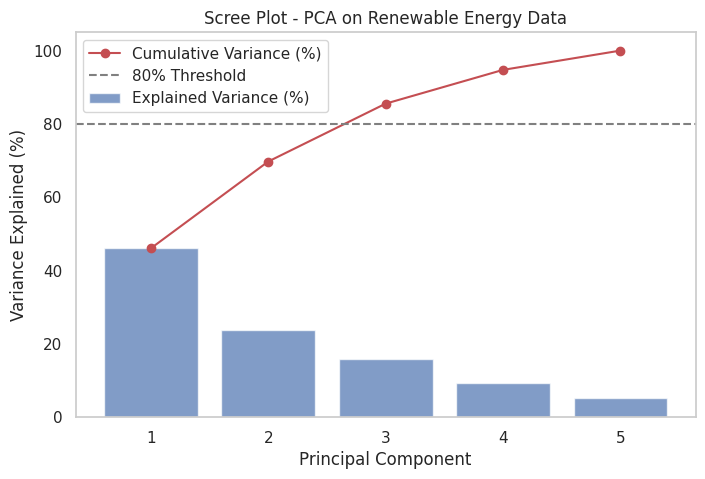

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi nilai eigen (varians dari setiap komponen utama)
eigenvalues = np.array([3.5, 1.8, 1.2, 0.7, 0.4])
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

# Plot Scree Plot dengan kumulatif varians
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio * 100, alpha=0.7, label="Explained Variance (%)")
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label="Cumulative Variance (%)")

# Tambahkan garis referensi
plt.axhline(y=80, color='gray', linestyle='--', label="80% Threshold")

# Label dan judul
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Scree Plot - PCA on Renewable Energy Data")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()
